In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('Bank_classification.csv',encoding=('ISO-8859-1'))

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1.0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1.0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0.0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0.0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0.0,0,1


In [5]:
print(df.shape)

(5000, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   object 
 2   Experience          5000 non-null   object 
 3   Income              5000 non-null   int64  
 4   ZIP Code            4999 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               4998 non-null   object 
 7   Education           5000 non-null   int64  
 8   Mortgage            4999 non-null   object 
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  4997 non-null   float64
 11  Online              5000 non-null   object 
 12  CreditCard          4998 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 507.9+ KB


In [7]:
df.isnull().mean()

ID                    0.0000
Age                   0.0000
Experience            0.0000
Income                0.0000
ZIP Code              0.0002
Family                0.0000
CCAvg                 0.0004
Education             0.0000
Mortgage              0.0002
Personal Loan         0.0000
Securities Account    0.0006
Online                0.0000
CreditCard            0.0004
dtype: float64

In [8]:
df['ZIP Code'].fillna(df['ZIP Code'].mode(),inplace=True)
df['CCAvg'].fillna(df['CCAvg'].mode(),inplace=True)
df['Mortgage'].fillna(df['Mortgage'].mode(),inplace=True)
df['Securities Account'].fillna(df['Securities Account'].mean(),inplace=True)
df['CreditCard'].fillna(df['CreditCard'].mode(),inplace=True)

In [9]:
df.duplicated().any()

False

In [10]:
df.describe()

,ID,Income,Family,Education,Securities Account
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,73.774200,2.396400,1.881000,0.104263
std,1443.520003,46.033729,1.147663,0.839869,0.305540
min,1.000000,8.000000,1.000000,1.000000,0.000000
25%,1250.750000,39.000000,1.000000,1.000000,0.000000
50%,2500.500000,64.000000,2.000000,2.000000,0.000000
75%,3750.250000,98.000000,3.000000,3.000000,0.000000
max,5000.000000,224.000000,4.000000,3.000000,1.000000


In [11]:
df['Personal Loan'] = df['Personal Loan'].replace('?', 0)
df['Personal Loan']=pd.to_numeric(df['Personal Loan'])

In [12]:
df['Age'] = df['Age'].replace('?', 0)
df['Age'] = df['Age'].replace('Nan', 0)
df['Age']=pd.to_numeric(df['Age'])

In [13]:
df['Experience'] = df['Experience'].replace('Nan', 0)
df['Experience']=pd.to_numeric(df['Experience'])

In [14]:
df['CCAvg']=df['CCAvg'].replace('3,6','3.6')
df['CCAvg']=df['CCAvg'].replace('?',0)
df['CCAvg']=df['CCAvg'].replace("Null",0)
df['CCAvg']=df['CCAvg'].replace('Nan',0)
df['CCAvg']=pd.to_numeric(df['CCAvg'])

In [15]:
df['Mortgage']=df['Mortgage'].replace('205,5','205.5')
df['Mortgage']=df['Mortgage'].replace('Nan',0)
df['Mortgage']=df['Mortgage'].replace('Not Found',0)
df['Mortgage']=pd.to_numeric(df['Mortgage'])

In [16]:
df['Online']=df['Online'].replace('one',1)
df['Online']=pd.to_numeric(df['Online'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            4999 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               4998 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            4999 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   float64
 11  Online              5000 non-null   int64  
 12  CreditCard          4998 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 507.9+ KB


In [18]:
df['CreditCard']=df['CreditCard'].replace('zero',0)
df['CreditCard']=pd.to_numeric(df['CreditCard'])

In [19]:
df=df.drop(['ID','ZIP Code'],axis=1)

In [20]:
df= df[np.isfinite(df).all(1)]

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

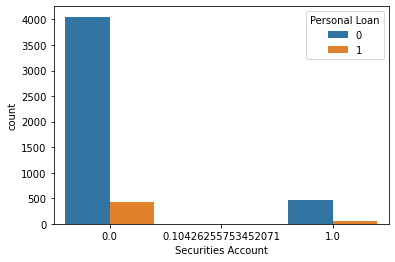

In [21]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')

<AxesSubplot:xlabel='Family', ylabel='count'>

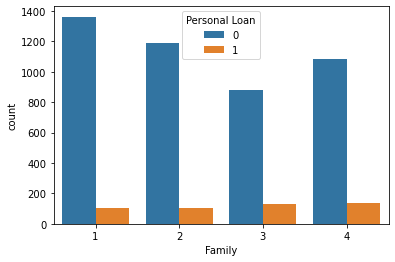

In [22]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<AxesSubplot:xlabel='Age', ylabel='count'>

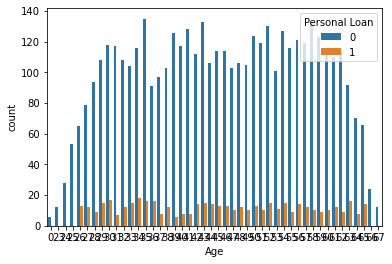

In [23]:
sns.countplot(x='Age',data=df,hue='Personal Loan')

<AxesSubplot:xlabel='Experience', ylabel='count'>

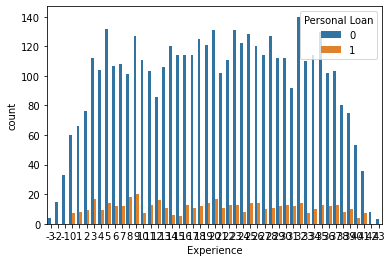

In [24]:
sns.countplot(x='Experience',data=df,hue='Personal Loan')

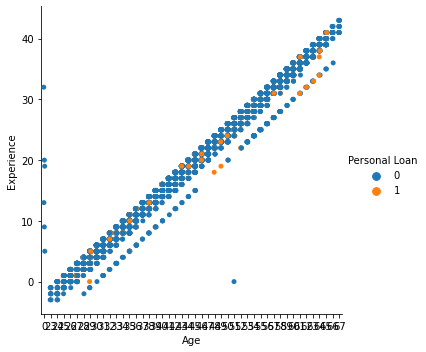

In [25]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df)

In [26]:
#Age increases Experience increases

In [27]:
loan1=df


In [28]:
x1=loan1.drop('Personal Loan', axis=1)
y1=loan1[['Personal Loan']]

In [29]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.2,random_state=1) #-->80:20

In [30]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(3996, 10)
(999, 10)
(3996, 1)
(999, 1)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
model1=LogisticRegression()
model1.fit(x1_train, y1_train)
predicted1= model1.predict(x1_test)
score1=model1.score(x1_test,y1_test)
acc_score1 = accuracy_score(predicted1, y1_test)*100
print(score1*100)
y1_hat = model1.predict(x1_test)
cm1=confusion_matrix(y1_test, y1_hat)
print(cm1)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.69269269269269
[[869  17]
 [ 56  57]]


E:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [34]:
score2 = []
k_list = []
for k in range(1, 30):
  model2= KNeighborsClassifier(n_neighbors= k)
  model2.fit(x1_train, y1_train)

  score2.append(model2.score(x1_test, y1_test))
  k_list.append(k)
    
predicted2 = model2.predict(x1_test) 
acc_score2 = accuracy_score(predicted2, y1_test)*100
print(score2)
print(k_list)
print(acc_score2)
y1_hat2= model2.predict(x1_test)
cm2=confusion_matrix(y1_test, y1_hat)
print(cm2)


E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

[0.8948948948948949, 0.8958958958958959, 0.9009009009009009, 0.9029029029029029, 0.8998998998998999, 0.9009009009009009, 0.8988988988988988, 0.8988988988988988, 0.9009009009009009, 0.8978978978978979, 0.8968968968968969, 0.8978978978978979, 0.8958958958958959, 0.8968968968968969, 0.8958958958958959, 0.8968968968968969, 0.8958958958958959, 0.8968968968968969, 0.8938938938938938, 0.8908908908908909, 0.8868868868868869, 0.8898898898898899, 0.8898898898898899, 0.8878878878878879, 0.8888888888888888, 0.8928928928928929, 0.8928928928928929, 0.8928928928928929, 0.8908908908908909]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
89.08908908908909
[[869  17]
 [ 56  57]]


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
model3=GaussianNB()
model3.fit(x1_train,y1_train)
score3=model3.score(x1_test,y1_test)*100
predicted3 = model3.predict(x1_test) 
acc_score3 = accuracy_score(predicted3, y1_test)*100
y1_hat3= model3.predict(x1_test)
cm3=confusion_matrix(y1_test, y1_hat)
print(score3)
print(acc_score3)
print(cm3)

88.78878878878879
88.78878878878879
[[869  17]
 [ 56  57]]


E:\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print("ALL MODELS")
print("Logistic Regression:"+str(acc_score1))
print("KNN:"+str(acc_score2))
print("Naive bayes:"+str(acc_score3))
print("******************confusion matrix************************")
print("Logistic Regression:    "+str(cm1))
print("KNN:   "  +str(cm2))
print("Naive bayes:   "+ str(cm3))




ALL MODELS
Logistic Regression:92.69269269269269
KNN:89.08908908908909
Naive bayes:88.78878878878879
******************confusion matrix************************
Logistic Regression:    [[869  17]
 [ 56  57]]
KNN:   [[869  17]
 [ 56  57]]
Naive bayes:   [[869  17]
 [ 56  57]]


In [ ]:
#KNN after scaling data

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x1)
x1 = x_normalized

In [39]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.2,random_state=1) #-->80:20

In [40]:
score2_scaler = []
k_list_scaler = []
for k in range(1, 30):
  model2_scaler= KNeighborsClassifier(n_neighbors= k)
  model2_scaler.fit(x1_train, y1_train)

  score2_scaler.append(model2_scaler.score(x1_test, y1_test))
  k_list_scaler.append(k)
    
predicted2_scaler = model2_scaler.predict(x1_test) 
acc_score2_scaler = accuracy_score(predicted2_scaler, y1_test)*100
print(score2_scaler)
print(k_list_scaler)
print(acc_score2_scaler)
y1_hat2_scaler= model2_scaler.predict(x1_test)
cm2_scaler=confusion_matrix(y1_test, y1_hat2_scaler)
print(cm2_scaler)

E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

[0.94994994994995, 0.934934934934935, 0.9409409409409409, 0.933933933933934, 0.9419419419419419, 0.9259259259259259, 0.9319319319319319, 0.924924924924925, 0.9309309309309309, 0.9219219219219219, 0.9259259259259259, 0.9219219219219219, 0.9219219219219219, 0.9169169169169169, 0.918918918918919, 0.914914914914915, 0.9179179179179179, 0.9119119119119119, 0.9129129129129129, 0.9129129129129129, 0.913913913913914, 0.908908908908909, 0.9119119119119119, 0.9099099099099099, 0.9129129129129129, 0.9079079079079079, 0.9099099099099099, 0.9059059059059059, 0.9079079079079079]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
90.7907907907908
[[886   0]
 [ 92  21]]


In [41]:
print("KNN by scalling accuracy-->"+str(acc_score2_scaler))

KNN by scalling accuracy-->90.7907907907908


In [42]:
#KNN will be the best choice to predict who will accept the personal loan